In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data=pd.read_excel('Iris.xls')

In [26]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Pre-Processing

In [6]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x916d369430>,
 'caps': [<matplotlib.lines.Line2D at 0x916d369af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x916d3690d0>],
 'medians': [<matplotlib.lines.Line2D at 0x916d3761f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x916d376550>],
 'means': []}

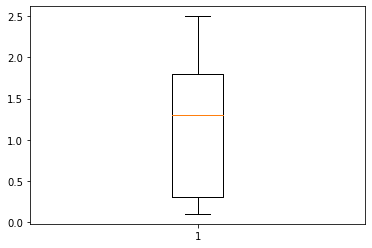

In [28]:
plt.boxplot(data['PW'])

{'whiskers': [<matplotlib.lines.Line2D at 0x916c8c9e20>,
 'caps': [<matplotlib.lines.Line2D at 0x916c8d6520>,
 'boxes': [<matplotlib.lines.Line2D at 0x916c8c9ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x916c8d6be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x916c8d6f40>],
 'means': []}

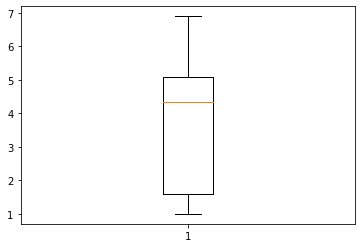

In [15]:
plt.boxplot(data['PL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x916c92edc0>,
 'caps': [<matplotlib.lines.Line2D at 0x916c93d4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x916c92ea60>],
 'medians': [<matplotlib.lines.Line2D at 0x916c93db80>],
 'fliers': [<matplotlib.lines.Line2D at 0x916c93dee0>],
 'means': []}

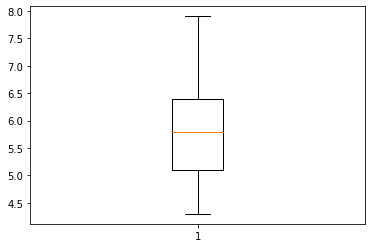

In [16]:
plt.boxplot(data['SL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x916d47fc70>,
 'caps': [<matplotlib.lines.Line2D at 0x916d48c370>,
 'boxes': [<matplotlib.lines.Line2D at 0x916d47f910>],
 'medians': [<matplotlib.lines.Line2D at 0x916d48ca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x916d48cd90>],
 'means': []}

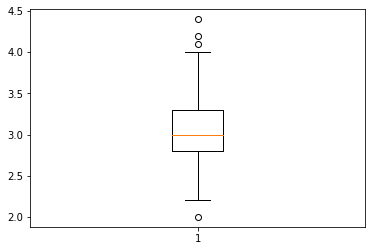

In [36]:
plt.boxplot(data['SW'])

In [37]:
q1=np.percentile(data['SW'],25,interpolation='midpoint')
q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Upper Limit:',q3+1.5*(q3-q1))
print('Lower Limit:',q1-1.5*(q3-q1))

Upper Limit: 4.05
Lower Limit: 2.05


In [38]:
outlier=[]
for x in data['SW']:
    if(x>q3+1.5*(q3-q1) or x<q1-1.5*(q3-q1)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

Int64Index([15, 32, 33, 60], dtype='int64')


{'whiskers': [<matplotlib.lines.Line2D at 0x916d586bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x916d5912b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x916d586850>],
 'medians': [<matplotlib.lines.Line2D at 0x916d591970>],
 'fliers': [<matplotlib.lines.Line2D at 0x916d591cd0>],
 'means': []}

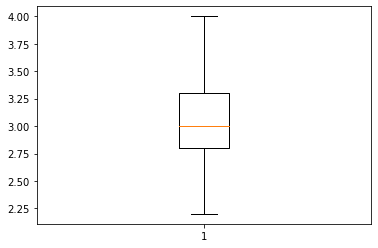

In [41]:
out=data[(data['SW']<q1-1.5*(q3-q1))|(data['SW']>(q3+1.5*(q3-q1)))]
ary=out.index
print(ary)
data.drop(ary,inplace=True)
plt.boxplot(data['SW'])

# Modelling

In [42]:
x = data.drop(['Classification'], axis =1)
x.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [43]:
y=data['Classification']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)
print("The nummber of samples in training set is",x_train.shape[0])
print ("The nummber of samples in testing set is",x_test.shape[0])

The nummber of samples in training set is 109
The nummber of samples in testing set is 37


Decision Tree Model

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
from sklearn.metrics import accuracy_score
y_pred = dt_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc=round(acc*100,2)
print('Accuracy of Decisioin Tree=',acc)

Accuracy of Decisioin Tree= 94.59


SVM Model

In [50]:
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc=round(acc*100,2)
print('Accuracy of SVM Model=',acc)

accuracy of SVM Model= 97.3


Random Forest Model

In [51]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc=round(acc*100,2)
print('Accuracy of Random Forest Model=',acc)

Accuracy of Random Forest Model= 94.59


We can say that SVM model is a efficient model while compared to Random Forest and Decision tree models